<a href="https://colab.research.google.com/github/Romulomrs/bases/blob/main/Regress%C3%A3o_linear_Veiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:

# Manuseio dos dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão da base de dados
from sklearn.model_selection import train_test_split


# Modelo de Regressão Linear
import statsmodels.api as sm

# Avaliação da performance do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [26]:

# Local do dataset online
url_dataset = 'https://raw.githubusercontent.com/lopes-andre/datasets/main/auto-mpg.csv'

# Carrega os dados em um DataFrame
cdata = pd.read_csv(url_dataset)
cdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [27]:

# Verifica o shape dos dados
print(f'Shape dos dados: {cdata.shape}\n')

print(f'Esta base de dados tem {cdata.shape[0]} linhas e {cdata.shape[1]} colunas.')


Shape dos dados: (398, 9)

Esta base de dados tem 398 linhas e 9 colunas.


In [28]:
# Resumo Estatístico dos dados
cdata.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [29]:
# Verifica os tipos das colunas e quantidade de entradas
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [30]:
# Dropa a coluna `car name`
cdata = cdata.drop('car name', axis=1)

In [31]:

# Cria um filtro com True onde a entrada é um dígito
# e False onde não é um dígito
hp_is_digit = cdata['horsepower'].str.isdigit()

In [32]:
# Imprime as entradas onde isdigit=False
cdata.loc[hp_is_digit == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [33]:
# Substitui '?' por np.NaN
cdata = cdata.replace('?', np.nan)
cdata.loc[hp_is_digit == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [39]:

# Converte a coluna `horsepower` do tipo objeto para o tipo float
cdata['horsepower'] = cdata['horsepower'].astype(float)
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [20]:
# Verifica a mediana das colunas
cdata.median()

mpg                23.0
cylinders           4.0
displacement      148.5
horsepower         93.5
weight           2803.5
acceleration       15.5
model year         76.0
origin_asia         0.0
origin_europa       0.0
dtype: float64

In [40]:

# Substitui os valores faltantes com a Mediana da coluna
cdata['horsepower'] = cdata['horsepower'].fillna(cdata['horsepower'].median())

In [36]:
# Cria dicionário para substituição
subs_dict = {
    1: 'america',
    2: 'europa',
    3: 'asia'
}

# Substitui no DataFrame
cdata['origin'] = cdata['origin'].replace(subs_dict)
cdata.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america
5,15.0,8,429.0,198.0,4341,10.0,70,america
6,14.0,8,454.0,220.0,4354,9.0,70,america
7,14.0,8,440.0,215.0,4312,8.5,70,america
8,14.0,8,455.0,225.0,4425,10.0,70,america
9,15.0,8,390.0,190.0,3850,8.5,70,america


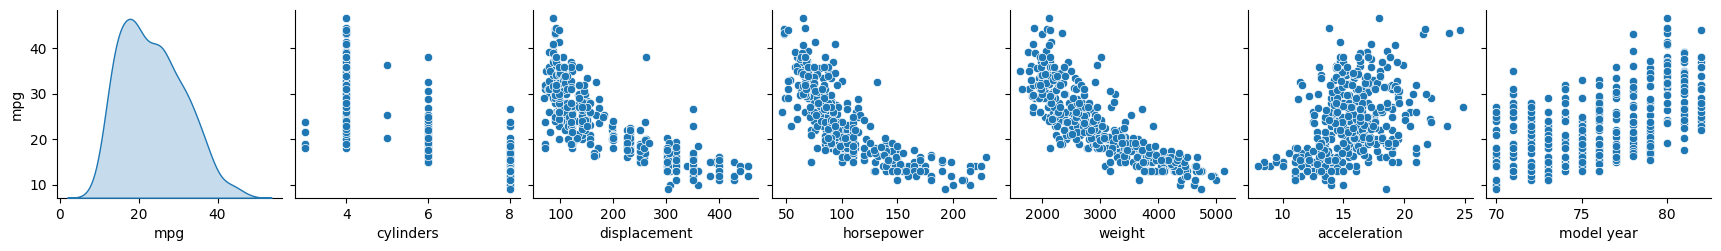

In [37]:
# Exibe apenas a relação entre mpg e as outras variáveis
sns.pairplot(cdata, diag_kind='kde', y_vars=['mpg'])

In [ ]:
# Cria o OneHotEncoding
cdata = pd.get_dummies(cdata, columns=['origin'], drop_first=True)
cdata.head()

In [ ]:

# Cria o OneHotEncoding
cdata = pd.get_dummies(cdata, columns=['origin'], drop_first=True)
cdata.head()

In [46]:
# Variáveis independentes (características)
X = cdata.drop(['mpg'], axis=1)
# Variável dependente (alvo)
y = cdata['mpg']


In [47]:
# Adiciona a constante
X = sm.add_constant(X)

In [48]:
# Divisão dos dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [49]:
# Instancia e treina o modelo
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [50]:

# Imprime o resumo da regressão
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     147.3
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.20e-93
Time:                        23:45:01   Log-Likelihood:                -734.21
No. Observations:                 278   AIC:                             1486.
Df Residuals:                     269   BIC:                             1519.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -21.2847      5.679     -3.748

In [51]:

# Imprime as métricas de MAE
print(f'Métrica MAE na base de treino: {mean_absolute_error(y_train, olsres.predict(X_train))}')
print(f'Métrica MAE na base de teste: {mean_absolute_error(y_test, olsres.predict(X_test))}')


Métrica MAE na base de treino: 2.6533207600102457
Métrica MAE na base de teste: 2.354281207220393


In [52]:
# Imprime as métricas de MSE
print(f'Métrica MSE na base de treino: {mean_squared_error(y_train, olsres.predict(X_train))}')
print(f'Métrica MSE na base de teste: {mean_squared_error(y_test, olsres.predict(X_test))}')

Métrica MSE na base de treino: 11.521429009864102
Métrica MSE na base de teste: 9.160979678961459
